In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import calendar
import datetime
import statistics

In [3]:
all_df = pd.read_pickle('all-results.pkl')
sorted_all_df = all_df.sort_values('created_utc', ascending=True)

In [4]:
def calculate_to_plot(df):
    to_plot = []
    vals = []
    time = calendar.timegm(datetime.datetime(2018, 12, 2).utctimetuple())
    step = 500
    for index, x in df.iterrows():
        if x.created_utc < time:
            vals += x.score*[x.sentiment]
        else:
            to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
            time += 24*60*60
            vals = [x.sentiment]
    to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
    return to_plot

In [5]:
all_plot = calculate_to_plot(sorted_all_df)

In [42]:
import matplotlib.pyplot as plt
import csv
sp_df = pd.read_csv('snp500.csv')
sp_df['NON_UTC'] = sp_df['Date']
sp_df['Date'] = sp_df['Date'].apply(lambda x : int(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()))


In [43]:
from scipy.interpolate import UnivariateSpline
s = UnivariateSpline([x[0] for x in all_plot], [x[1] for x in all_plot], s=1)
xs = [x[0] for x in all_plot]
ys = s(xs)

df_new = pd.DataFrame(list(zip(xs,ys)), columns = ['Date','Sentiment'])

In [8]:
investing_df = all_df[all_df.subreddit == 'investing']
sorted_investing_df = investing_df.sort_values('created_utc', ascending=True)
investing_plot = calculate_to_plot(sorted_investing_df)                      

In [22]:
from scipy.interpolate import UnivariateSpline
s = UnivariateSpline([x[0] for x in investing_plot], [x[1] for x in investing_plot], s=1)
xs_investing = [x[0] for x in investing_plot]
ys_investing = s(xs_investing)
# xs_investing = [x[2] for x in investing_plot]
df_new_investing = pd.DataFrame(list(zip(xs_investing,ys_investing)), columns = ['Date','Sentiment'])

Text(0, 0.5, 'close')

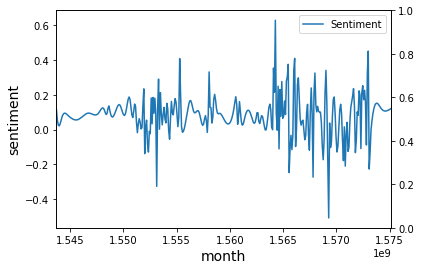

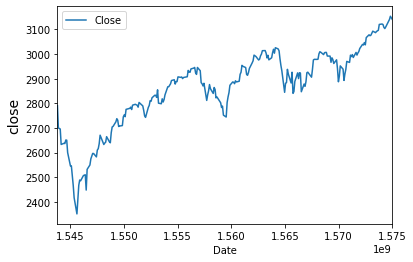

In [44]:
ax = df_new.plot(x='Date',y='Sentiment')
ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("sentiment",fontsize=14)
ax.set_prop_cycle(None)

ax2 = ax.twinx()
ax2 = sp_df.plot(x='Date',y='Close') 
ax2.set_ylabel("close",fontsize=14)


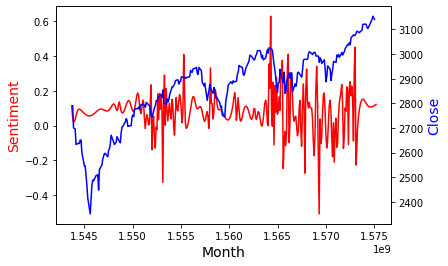

In [45]:
fig,ax = plt.subplots()
ax.plot(df_new.Date,df_new.Sentiment,color="red")
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Sentiment",color="red",fontsize=14)
ax.set_prop_cycle(None)

ax2 = ax.twinx()
ax2.plot(sp_df.Date,sp_df.Close,color="blue")
ax2.set_ylabel("Close", color = "blue",fontsize=14)
plt.show()



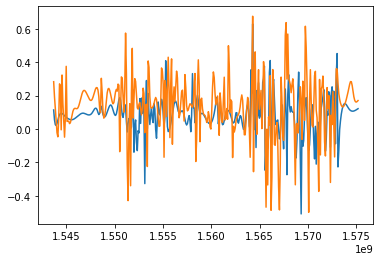

In [12]:
fig = plt.figure()

for frame in [df_new, df_new_investing]:
    plt.plot(frame['Date'], frame['Sentiment'])